# Student data analysis


## General analysis


In [5014]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import data and print shape (dimensions).


In [5015]:
data = pd.read_csv("student_data.csv")
data.shape


(745, 16)

In [5016]:
data.head()


,gender,reason,traveltime,studytime,failures,activities,higher,siblings,freetime,hangouts_p_week,absences,maths,stats,comp_sci,parentedu,god
0,F,course,2,2,0,no,yes,2,3,4,4,F,B,B,Masters,yes
1,F,course,1,2,0,no,yes,3,3,3,2,C,B,B,10th Pass,yes
2,F,other,1,2,0,no,yes,2,3,2,6,B,B+,B,10th Pass,yes
3,F,home,1,3,0,yes,yes,2,2,2,0,B+,B+,B+,Masters,no
4,F,home,1,2,0,no,yes,2,3,2,0,B,B+,B+,Bachelors,yes


Sorting categorical data


In [5017]:
data["maths"] = data["maths"].astype("category")
data["maths"].unique()


['F', 'C', 'B', 'B+', 'A', 'A+', 'D', 'O']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [5018]:
data["comp_sci"] = data["comp_sci"].astype("category")
data["comp_sci"].unique()


['B', 'B+', 'A+', 'A', 'D', 'C', 'F', 'O']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [5019]:
data["stats"] = data["stats"].astype("category")
data["stats"].unique()


['B', 'B+', 'A', 'A+', 'D', 'C', 'F', 'O']
Categories (8, object): ['A', 'A+', 'B', 'B+', 'C', 'D', 'F', 'O']

In [5020]:
data["maths"] = pd.Categorical(
    data["maths"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)
data["comp_sci"] = pd.Categorical(
    data["comp_sci"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)
data["stats"] = pd.Categorical(
    data["stats"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)


In [5021]:
data["parentedu"].unique()


array(['Masters', '10th Pass', 'Bachelors', '12th Pass'], dtype=object)

In [5022]:
data["parentedu"] = pd.Categorical(
    data["parentedu"], ["10th Pass", "12th Pass", "Bachelors", "Masters"]
)


Print first 5 rows of data.


In [5023]:
data.head(5)


,gender,reason,traveltime,studytime,failures,activities,higher,siblings,freetime,hangouts_p_week,absences,maths,stats,comp_sci,parentedu,god
0,F,course,2,2,0,no,yes,2,3,4,4,F,B,B,Masters,yes
1,F,course,1,2,0,no,yes,3,3,3,2,C,B,B,10th Pass,yes
2,F,other,1,2,0,no,yes,2,3,2,6,B,B+,B,10th Pass,yes
3,F,home,1,3,0,yes,yes,2,2,2,0,B+,B+,B+,Masters,no
4,F,home,1,2,0,no,yes,2,3,2,0,B,B+,B+,Bachelors,yes


Printing number of unique values for each object type.


In [5024]:
data.select_dtypes("object").nunique()


gender        2
reason        4
activities    2
higher        2
god           2
dtype: int64

Calculate missing data (I have cleaned this data).


In [5025]:
data.isnull().sum() / data.shape[0]


gender             0.0
reason             0.0
traveltime         0.0
studytime          0.0
failures           0.0
activities         0.0
higher             0.0
siblings           0.0
freetime           0.0
hangouts_p_week    0.0
absences           0.0
maths              0.0
stats              0.0
comp_sci           0.0
parentedu          0.0
god                0.0
dtype: float64

Calculate descriptive statistics for valid objects.


In [5026]:
data.describe(percentiles=[])


,traveltime,studytime,failures,siblings,freetime,hangouts_p_week,absences
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1.445638,1.981208,0.185235,2.183893,3.174497,3.127517,3.852349
std,0.691780,0.846988,0.551681,0.639017,1.026082,1.147043,4.743949
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,0.000000,2.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,32.000000


In [5027]:
data.loc[(data["absences"] == 0)].shape[0] / data.shape[0] * 100


35.43624161073826

36.95% of students were never absent.


In [5028]:
data.loc[(data["siblings"] > 0)].shape[0] / data.shape[0] * 100


97.18120805369126

96.82% of students have atleast one sibling


In [5029]:
data.loc[(data["failures"] == 0)].shape[0] / data.shape[0] * 100


87.24832214765101

86.45% students have reported that they have not failed in the previous semester. (The analysis is based on current semester).


## Count analysis of various attributes


### Counting male and female participants


Text(0, 0.5, 'Count')

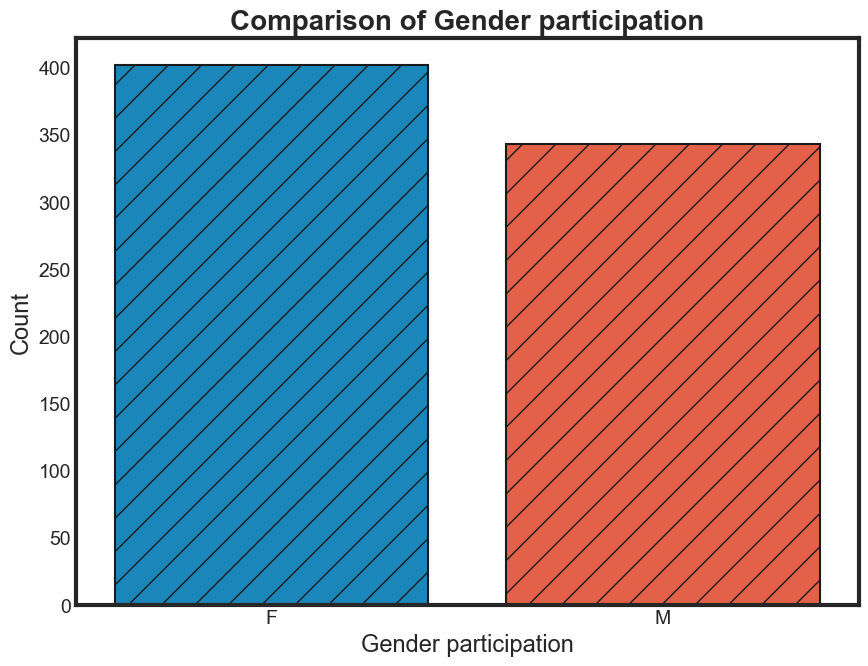

In [5030]:
graph = sns.countplot(data, x="gender", edgecolor="0.1", linewidth=1.5, hatch="/")
graph.set_title("Comparison of Gender participation", weight="bold", fontsize=20)
graph.set_xlabel("Gender participation", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


In [5031]:
plt.rcParams["figure.figsize"] = (9, 7)
plt.style.use("fivethirtyeight")
sns.set_style("ticks")


### Maths grade


Text(0, 0.5, 'Count')

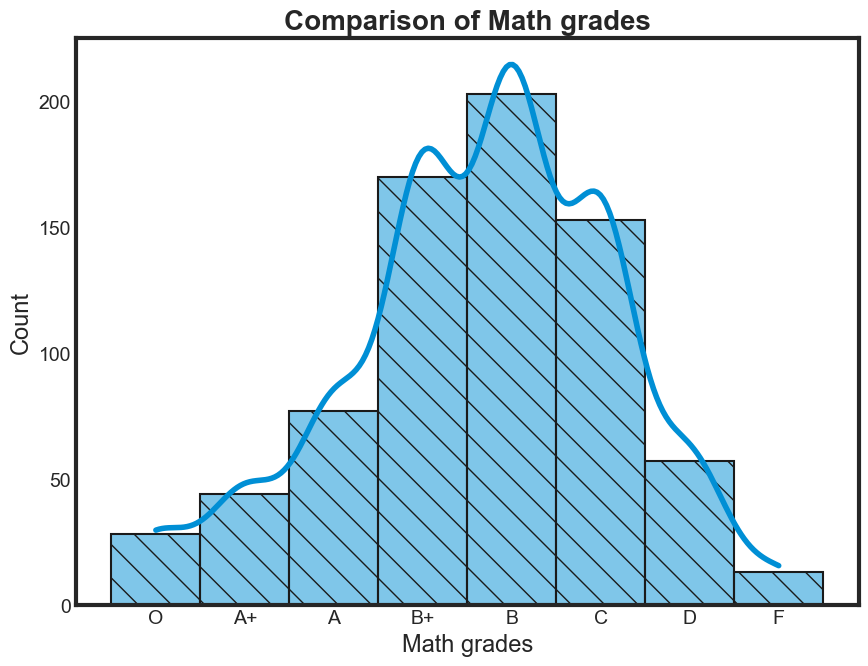

In [5032]:
graph = sns.histplot(
    data, x="maths", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Math grades", weight="bold", fontsize=20)
graph.set_xlabel("Math grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

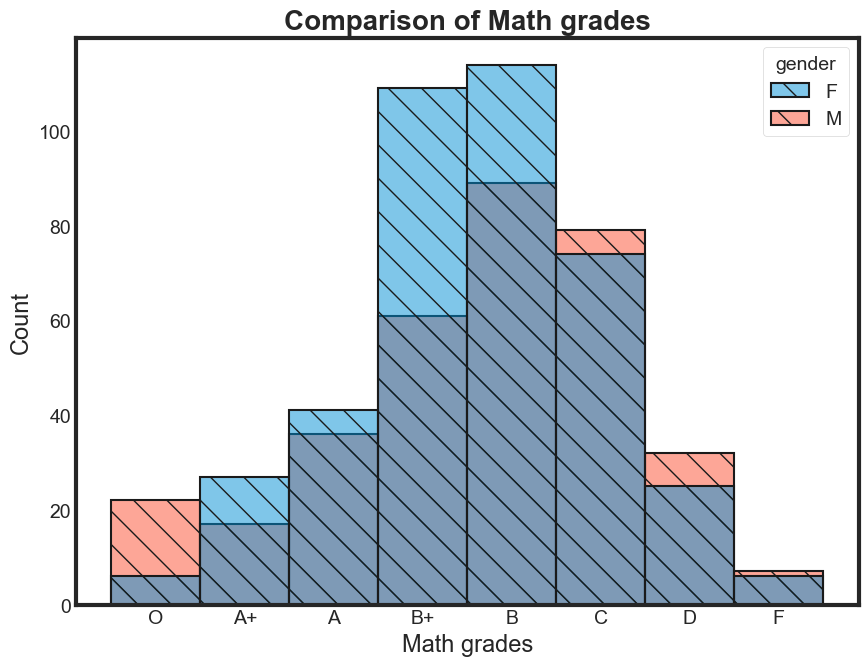

In [5033]:
graph = sns.histplot(
    data, x="maths", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Math grades", weight="bold", fontsize=20)
graph.set_xlabel("Math grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Computer Science grade


Text(0, 0.5, 'Count')

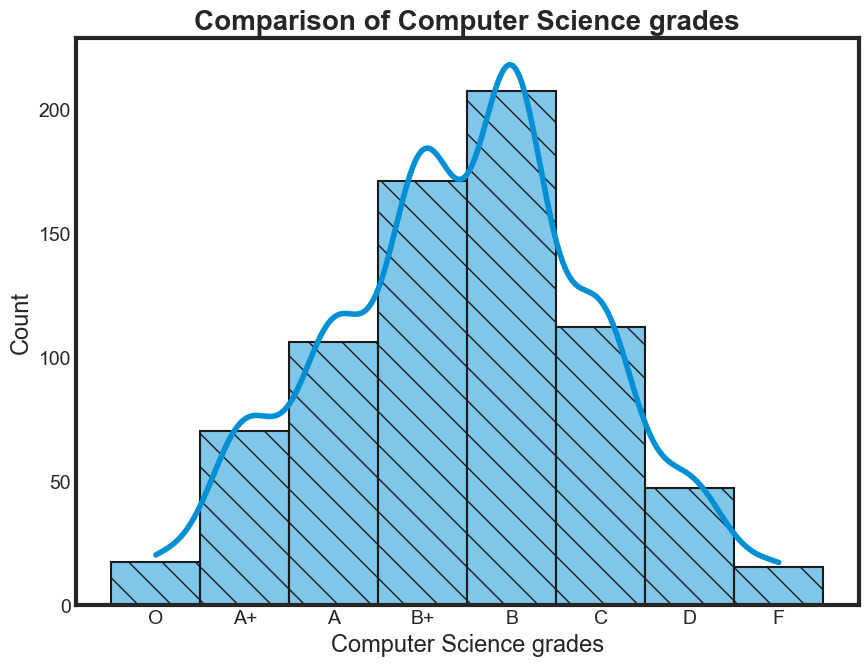

In [5034]:
graph = sns.histplot(
    data, x="comp_sci", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Computer Science grades", weight="bold", fontsize=20)
graph.set_xlabel("Computer Science grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

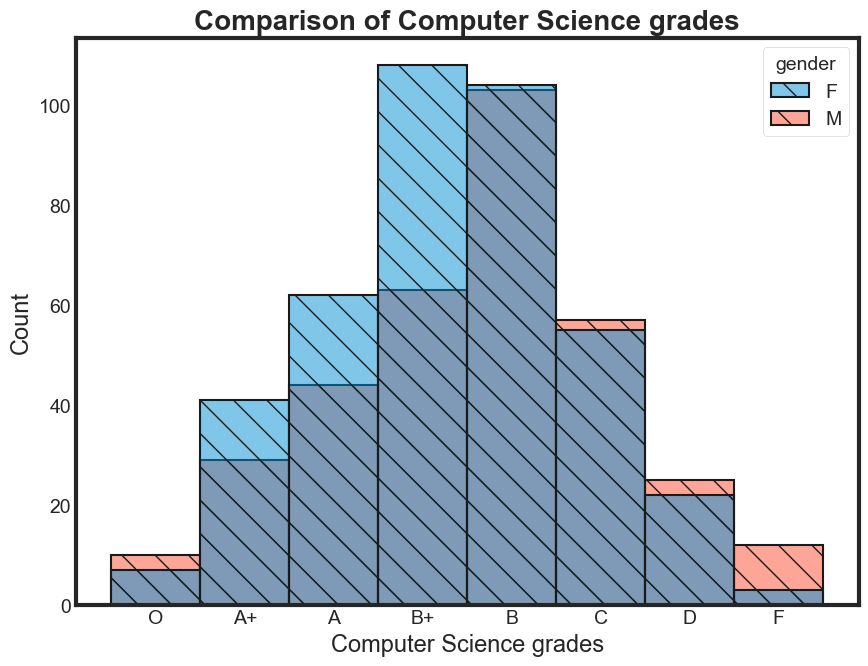

In [5035]:
graph = sns.histplot(
    data, x="comp_sci", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Computer Science grades", weight="bold", fontsize=20)
graph.set_xlabel("Computer Science grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Statistics grade


Text(0, 0.5, 'Count')

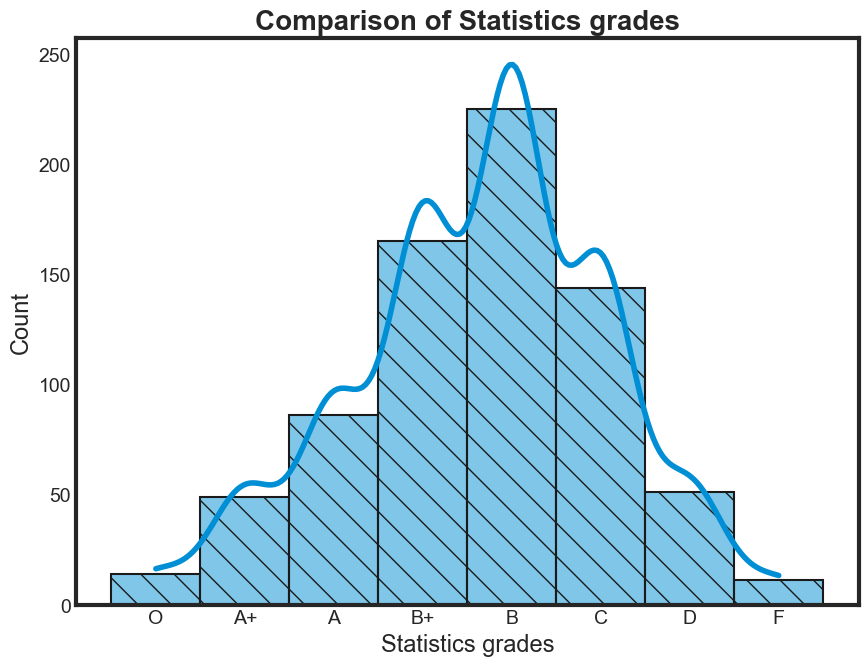

In [5036]:
graph = sns.histplot(
    data, x="stats", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Statistics grades", weight="bold", fontsize=20)
graph.set_xlabel("Statistics grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

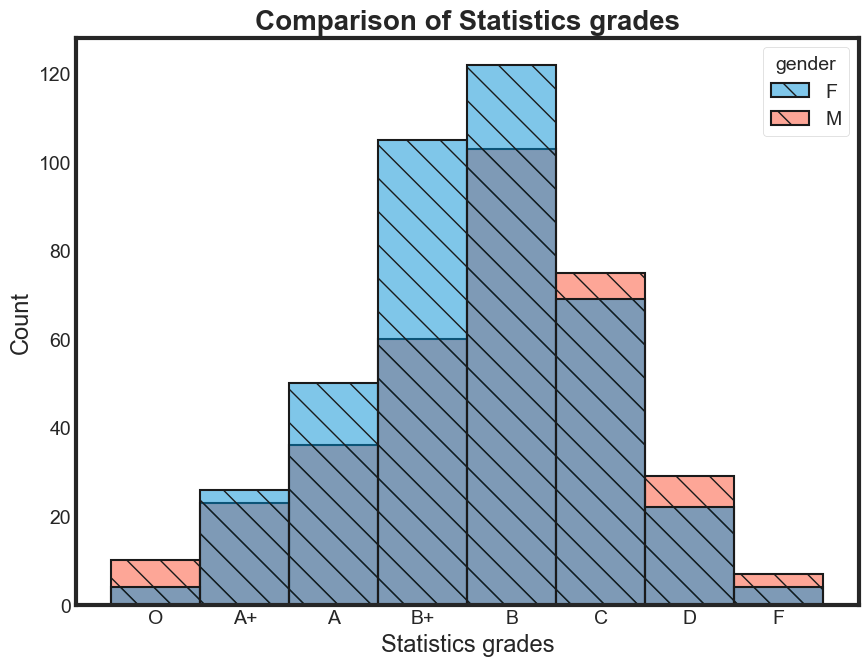

In [5037]:
graph = sns.histplot(
    data, x="stats", edgecolor="0.1", linewidth=1.5, hatch="\\", hue="gender"
)
graph.set_title("Comparison of Statistics grades", weight="bold", fontsize=20)
graph.set_xlabel("Statistics grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


All grade curves look similar to a normal distribution curve


### Hangouts per week.


Text(0, 0.5, 'Count')

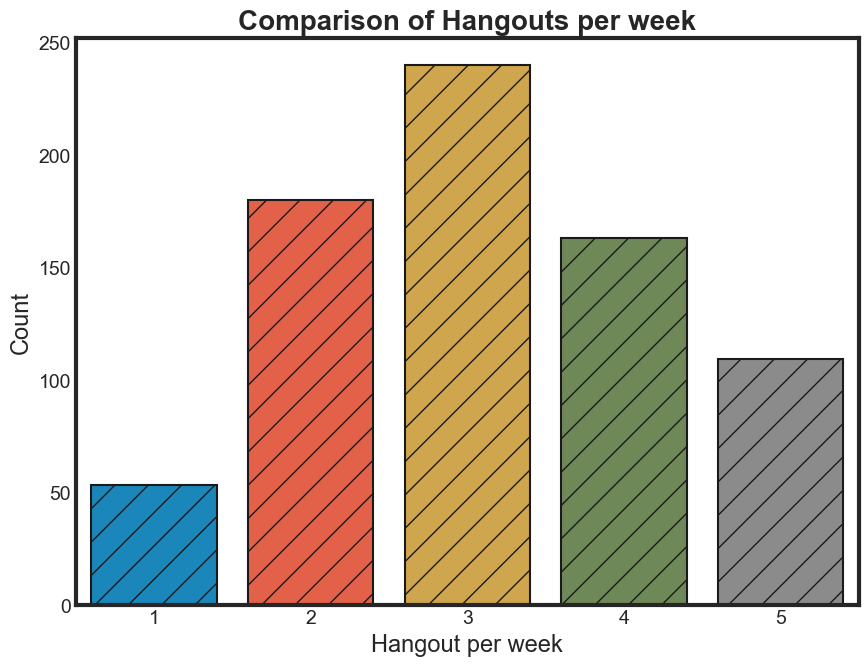

In [5038]:
graph = sns.countplot(
    data, x="hangouts_p_week", edgecolor="0.1", linewidth=1.5, hatch="/"
)
graph.set_title("Comparison of Hangouts per week", weight="bold", fontsize=20)
graph.set_xlabel("Hangout per week", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### Highest level of Parental education.


Text(0, 0.5, 'Count')

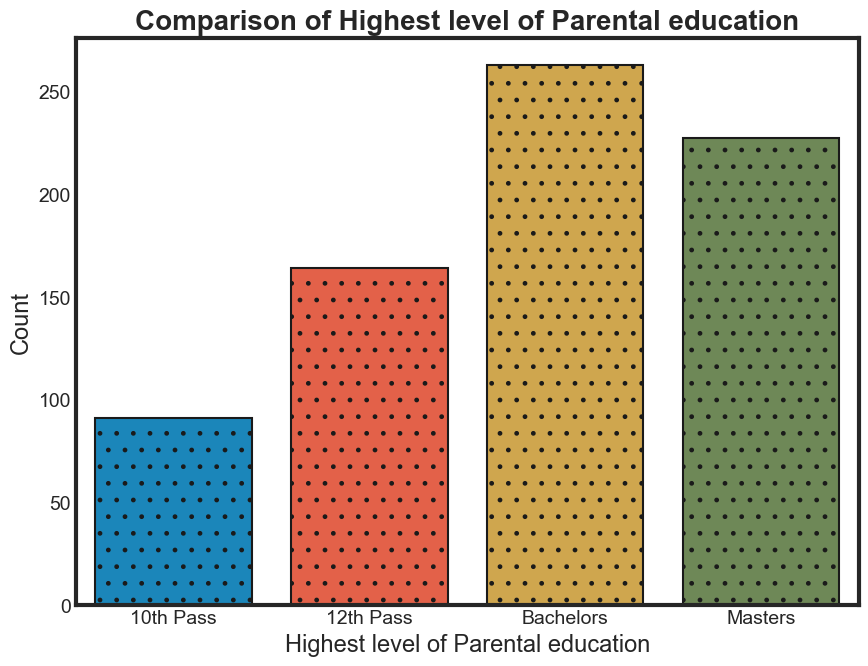

In [5039]:
graph = sns.countplot(data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".")
graph.set_title(
    "Comparison of Highest level of Parental education", weight="bold", fontsize=20
)
graph.set_xlabel("Highest level of Parental education", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

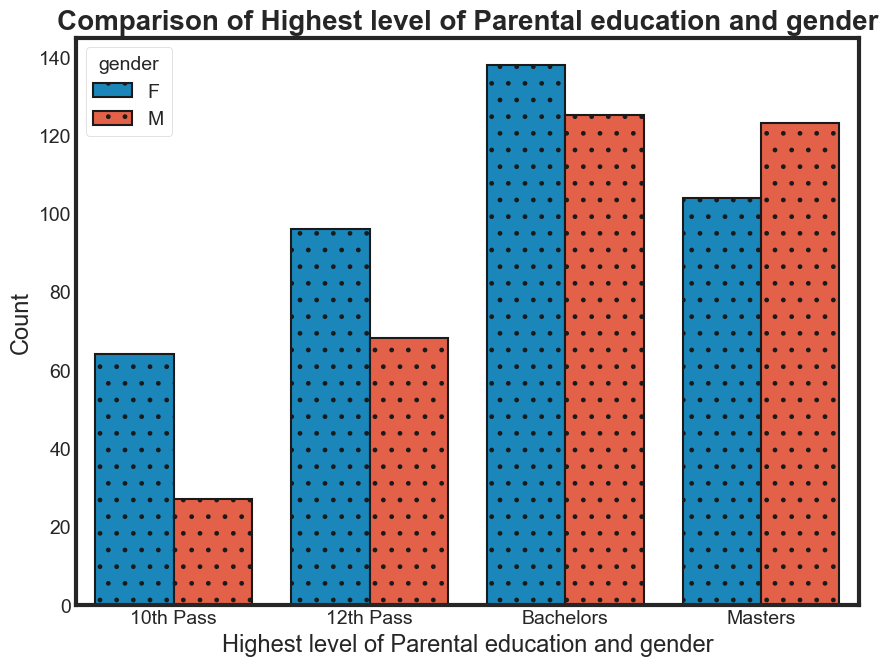

In [5040]:
graph = sns.countplot(
    data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".", hue="gender"
)
graph.set_title(
    "Comparison of Highest level of Parental education and gender",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel(
    "Highest level of Parental education and gender", fontweight=20, fontsize=17
)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


### God


Text(0, 0.5, 'Count')

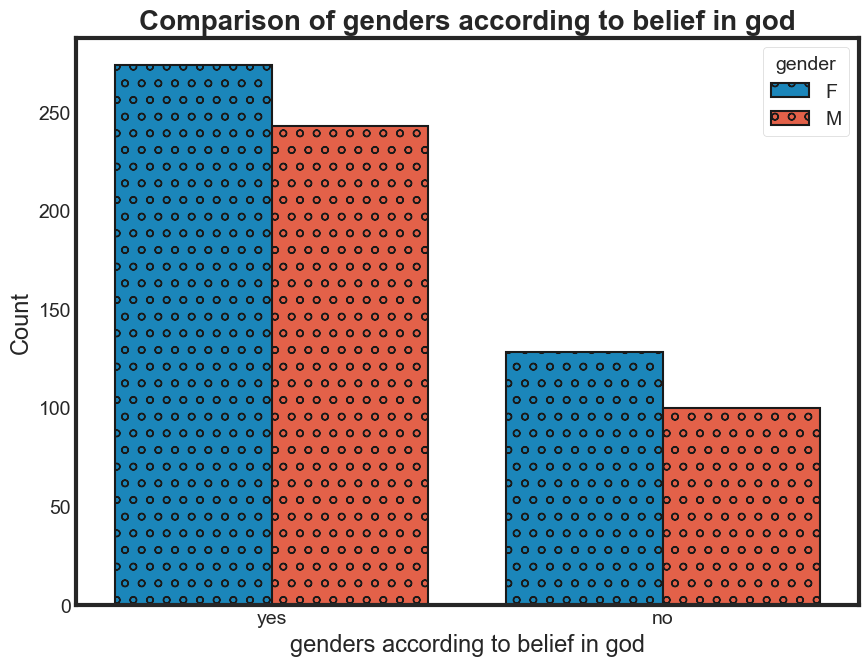

In [5041]:
graph = sns.countplot(
    data, x="god", edgecolor="0.1", linewidth=1.5, hatch="o", hue="gender"
)
graph.set_title(
    "Comparison of genders according to belief in god", weight="bold", fontsize=20
)
graph.set_xlabel("genders according to belief in god", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


## Comparision analysis


### Parental level of education


Text(0.5, 20.583333333333293, 'Reason')

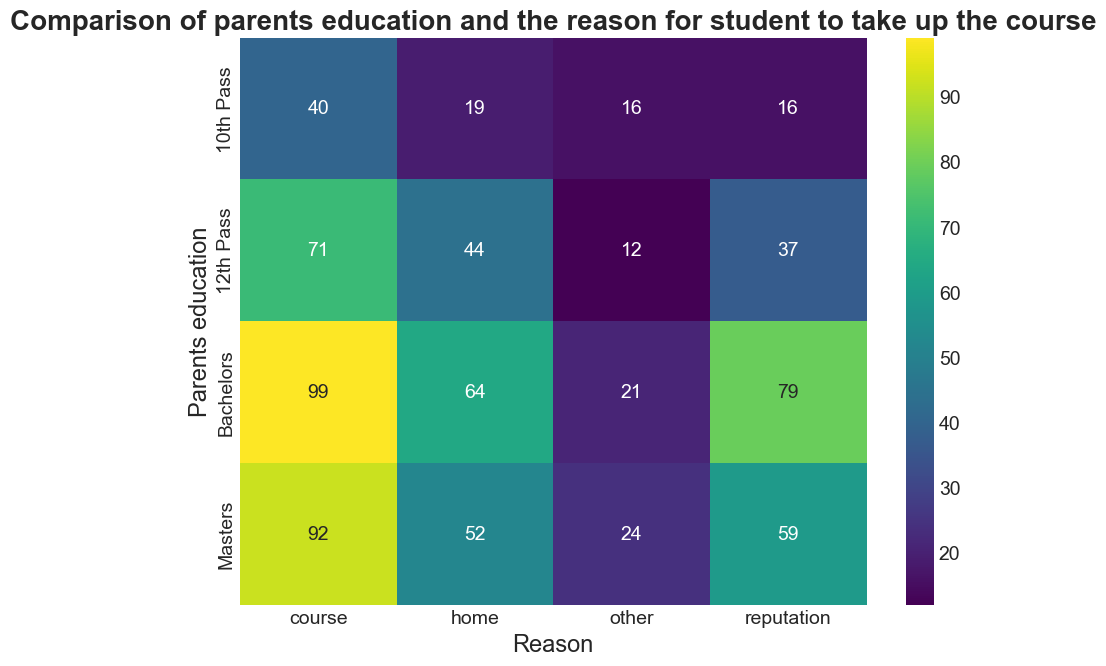

In [5042]:
ct = pd.crosstab(data["parentedu"], data["reason"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of parents education and the reason for student to take up the course",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Parents education", fontweight=20, fontsize=17)
graph.set_xlabel("Reason", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

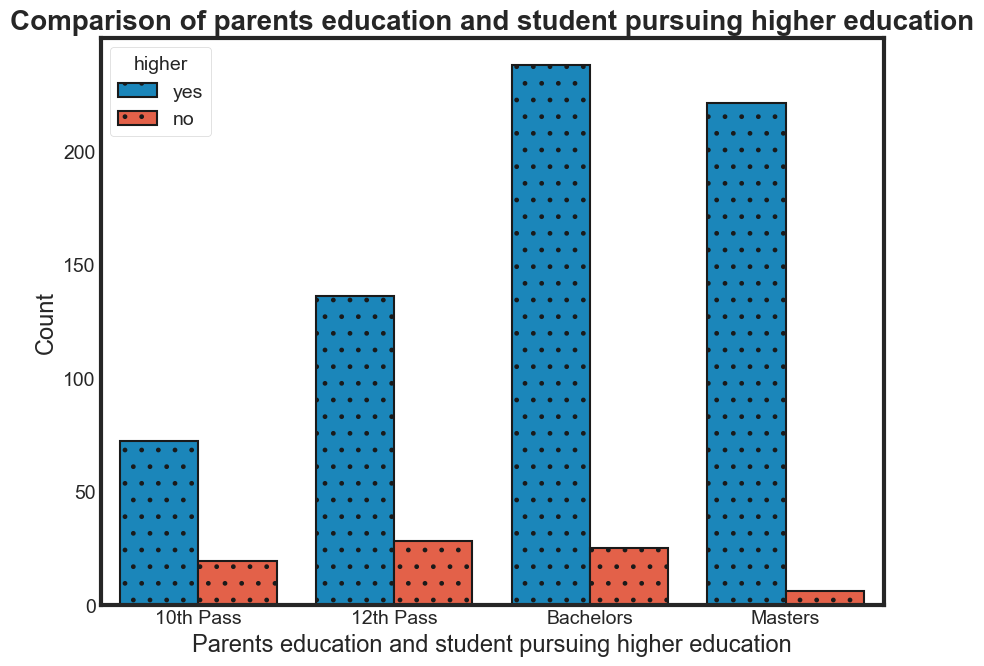

In [5043]:
graph = sns.countplot(
    data, x="parentedu", edgecolor="0.1", linewidth=1.5, hatch=".", hue="higher"
)
graph.set_title(
    "Comparison of parents education and student pursuing higher education",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel(
    "Parents education and student pursuing higher education",
    fontweight=20,
    fontsize=17,
)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Studytime')

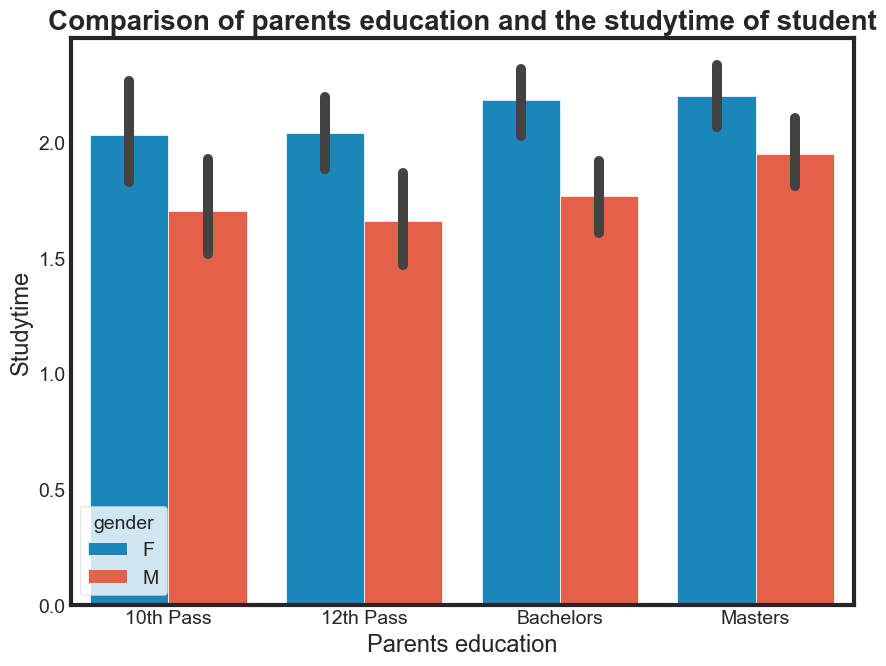

In [5044]:
graph = sns.barplot(data, x="parentedu", y="studytime", hue="gender")
graph.set_title(
    "Comparison of parents education and the studytime of student",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Parents education", fontweight=20, fontsize=17)
graph.set_ylabel("Studytime", fontweight=20, fontsize=17)


Men in general studied less, especially those whose parents passed 12th studied the least


Text(0.5, 20.583333333333293, 'Reason')

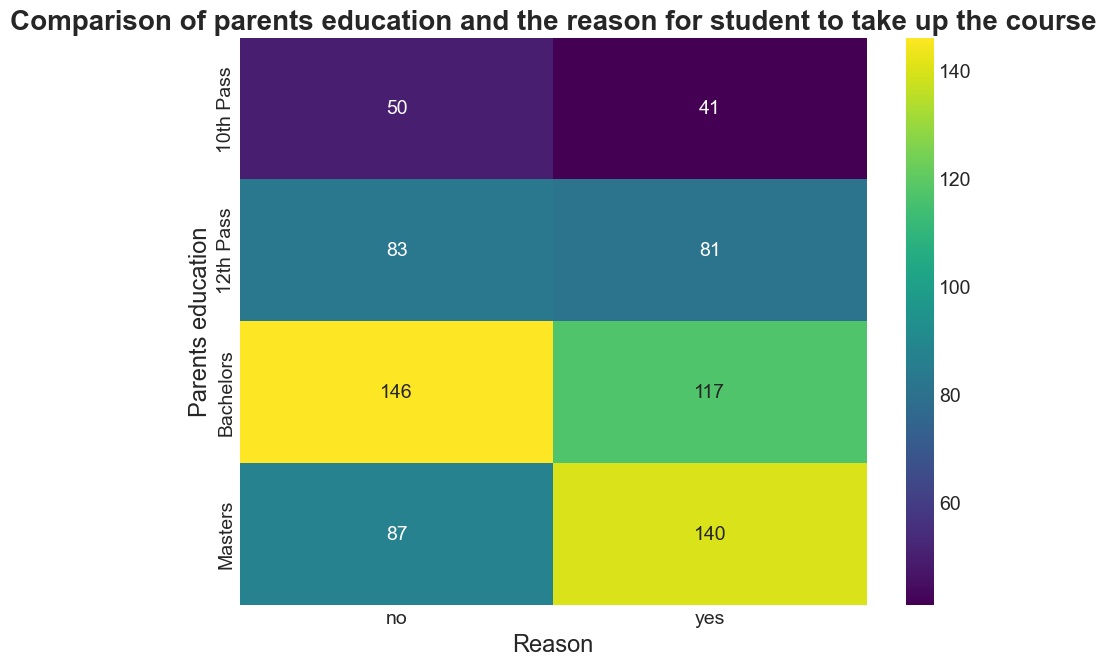

In [5045]:
ct = pd.crosstab(data["parentedu"], data["activities"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of parents education and the reason for student to take up the course",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Parents education", fontweight=20, fontsize=17)
graph.set_xlabel("Reason", fontweight=20, fontsize=17)


### Grades


#### Converting grades into gpa


In [5046]:
def getgpa(grade):
    if grade == "O":
        return 10
    elif grade == "A+":
        return 9
    elif grade == "A":
        return 8
    elif grade == "B+":
        return 7
    elif grade == "B":
        return 6
    elif grade == "C":
        return 5
    elif grade == "D":
        return 4
    else:
        return 0


data["maths_gpa"] = data["maths"].apply(getgpa)
data["comp_sci_gpa"] = data["comp_sci"].apply(getgpa)
data["stats_gpa"] = data["stats"].apply(getgpa)


In [5047]:
data[["maths", "maths_gpa"]].head()


,maths,maths_gpa
0,F,0
1,C,5
2,B,6
3,B+,7
4,B,6


In [5048]:
data[["comp_sci", "comp_sci_gpa"]].head()


,comp_sci,comp_sci_gpa
0,B,6
1,B,6
2,B,6
3,B+,7
4,B+,7


In [5049]:
data[["stats", "stats_gpa"]].head()


,stats,stats_gpa
0,B,6
1,B,6
2,B+,7
3,B+,7
4,B+,7


#### Calculating overall grade


In [5050]:
def overall_gpa(row):
    if row["maths_gpa"] and row["comp_sci_gpa"] and row["stats_gpa"]:
        return round((row["maths_gpa"] + row["comp_sci_gpa"] + row["stats_gpa"]) / 3)
    else:
        return 0


data["overall_gpa"] = data.apply(overall_gpa, axis=1)
data[["overall_gpa", "maths_gpa", "stats_gpa", "comp_sci_gpa"]].head()


,overall_gpa,maths_gpa,stats_gpa,comp_sci_gpa
0,0,0,6,6
1,6,5,6,6
2,6,6,7,6
3,7,7,7,7
4,7,6,7,7


In [5051]:
def getgrade(gpa):
    if gpa == 10:
        return "O"
    elif gpa == 9:
        return "A+"
    elif gpa == 8:
        return "A"
    elif gpa == 7:
        return "B+"
    elif gpa == 6:
        return "B"
    elif gpa == 5:
        return "C"
    elif gpa == 4:
        return "D"
    else:
        return "F"


data["overall"] = data["overall_gpa"].apply(getgrade)
data["overall"] = pd.Categorical(
    data["overall"], ["O", "A+", "A", "B+", "B", "C", "D", "F"]
)
data["overall"].head()


0     F
1     B
2     B
3    B+
4    B+
Name: overall, dtype: category
Categories (8, object): ['O', 'A+', 'A', 'B+', 'B', 'C', 'D', 'F']

#### Analyzing overall grade


Text(0, 0.5, 'Count')

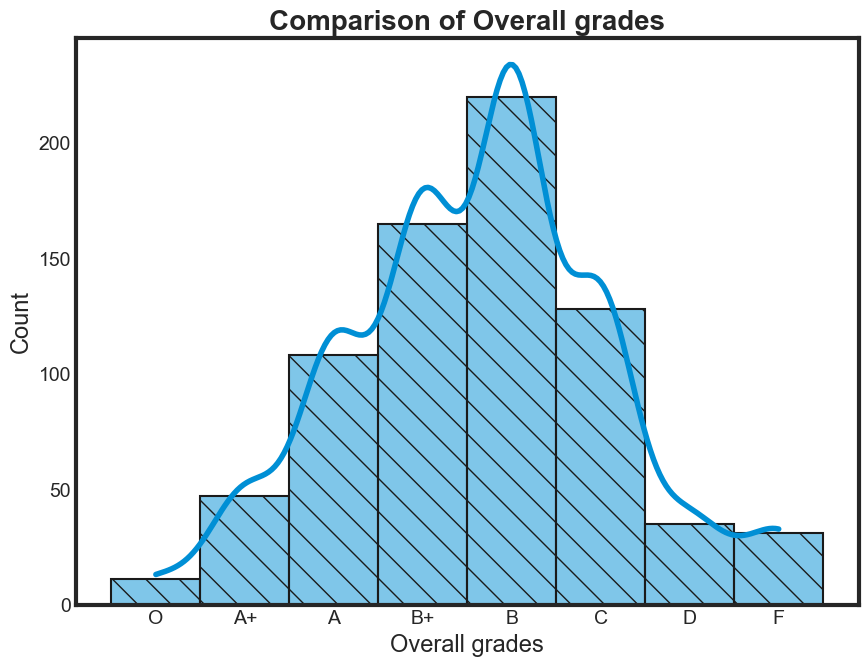

In [5052]:
graph = sns.histplot(
    data, x="overall", edgecolor="0.1", linewidth=1.5, hatch="\\", kde=True
)
graph.set_title("Comparison of Overall grades", weight="bold", fontsize=20)
graph.set_xlabel("Overall grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

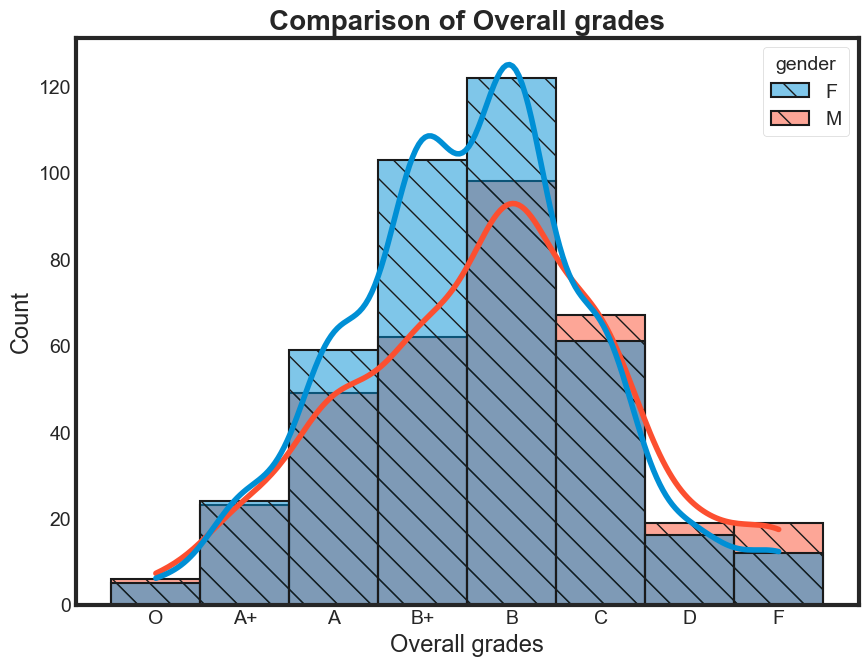

In [5053]:
graph = sns.histplot(
    data,
    x="overall",
    edgecolor="0.1",
    linewidth=1.5,
    hatch="\\",
    kde=True,
    hue="gender",
)
graph.set_title("Comparison of Overall grades", weight="bold", fontsize=20)
graph.set_xlabel("Overall grades", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


#### Failed student vs passed student


In [5054]:
def Pass(grade):
    if grade == "F":
        return "fail"
    else:
        return "pass"


data["overall_status"] = data["overall"].apply(Pass)
data["overall_status"].head()


0    fail
1    pass
2    pass
3    pass
4    pass
Name: overall_status, dtype: object

Text(0, 0.5, 'Count')

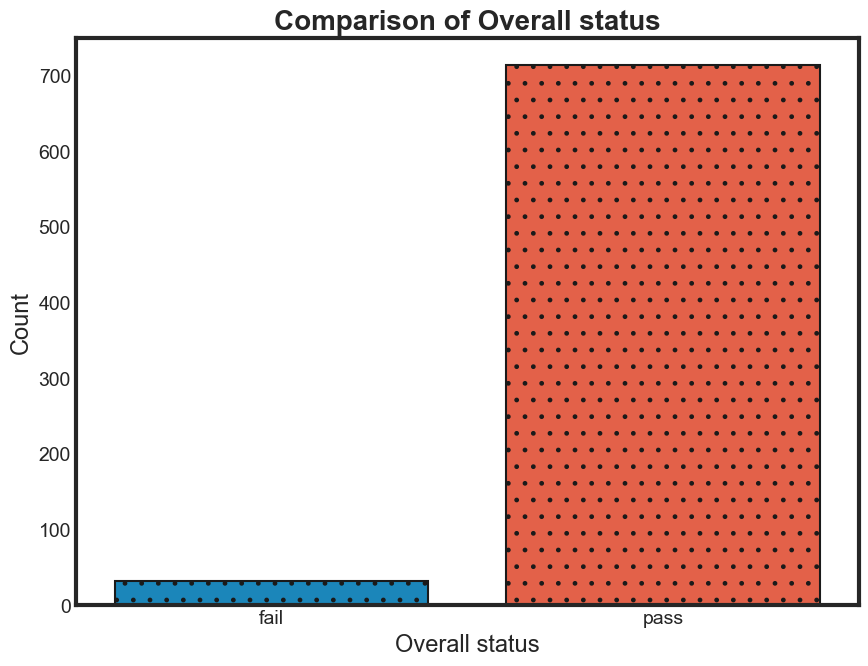

In [5055]:
graph = sns.countplot(
    data, x="overall_status", edgecolor="0.1", linewidth=1.5, hatch="."
)
graph.set_title("Comparison of Overall status", weight="bold", fontsize=20)
graph.set_xlabel("Overall status", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Count')

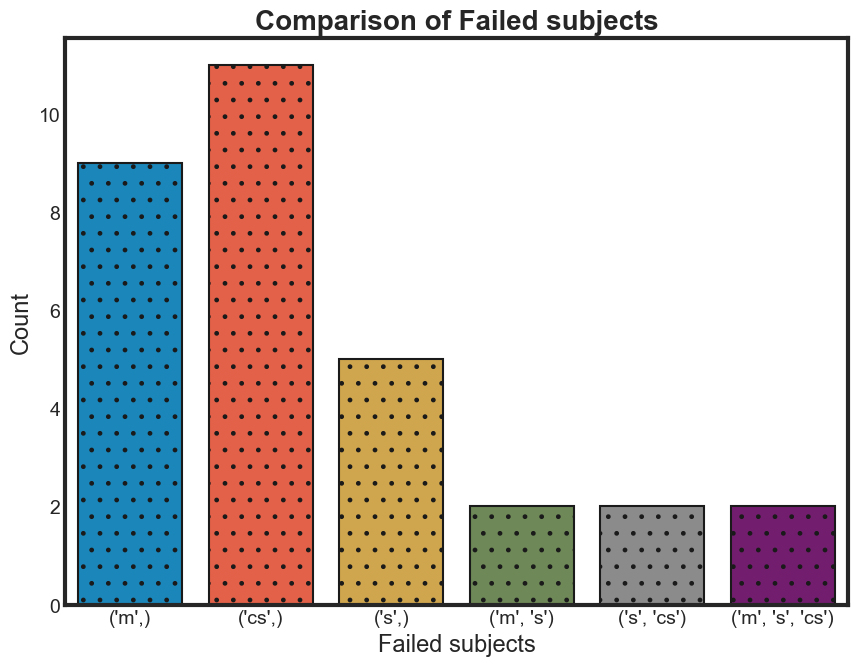

In [5056]:
def get_fail_subject(row):
    subject = list()
    if row["maths"] == "F":
        subject.append("m")
    if row["stats"] == "F":
        subject.append("s")
    if row["comp_sci"] == "F":
        subject.append("cs")
    if len(subject) <= 0:
        return pd.NA
    return tuple(subject)


data["failed_subjects"] = data.apply(get_fail_subject, axis=1)
data["failed_subjects"].head()

graph = sns.countplot(
    data, x="failed_subjects", edgecolor="0.1", linewidth=1.5, hatch="."
)
graph.set_title("Comparison of Failed subjects", weight="bold", fontsize=20)
graph.set_xlabel("Failed subjects", fontweight=20, fontsize=17)
graph.set_ylabel("Count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Overall GPA')

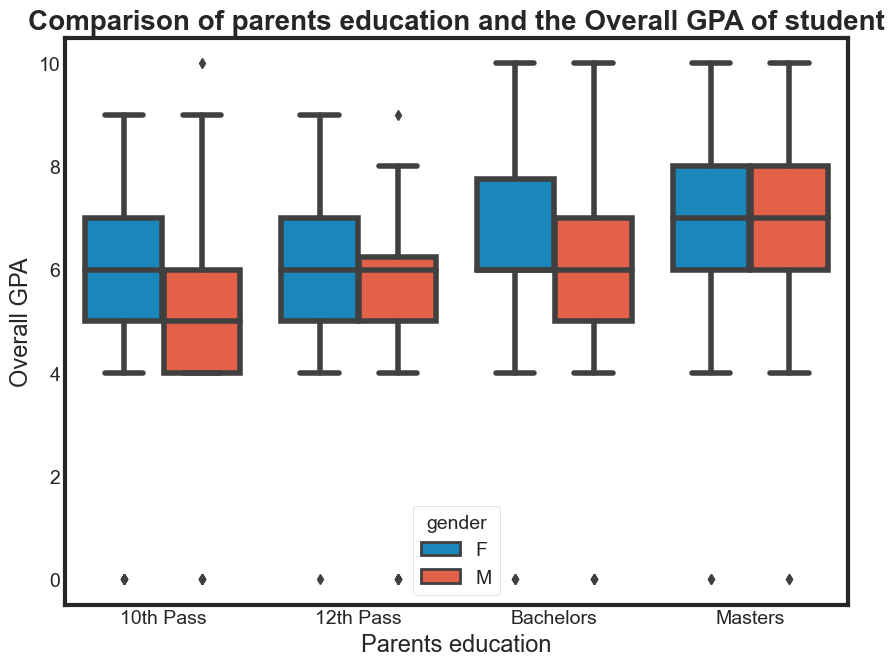

In [5057]:
graph = sns.boxplot(data, x="parentedu", y="overall_gpa", hue="gender")
graph.set_title(
    "Comparison of parents education and the Overall GPA of student",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Parents education", fontweight=20, fontsize=17)
graph.set_ylabel("Overall GPA", fontweight=20, fontsize=17)


Text(0, 0.5, 'Traveltime')

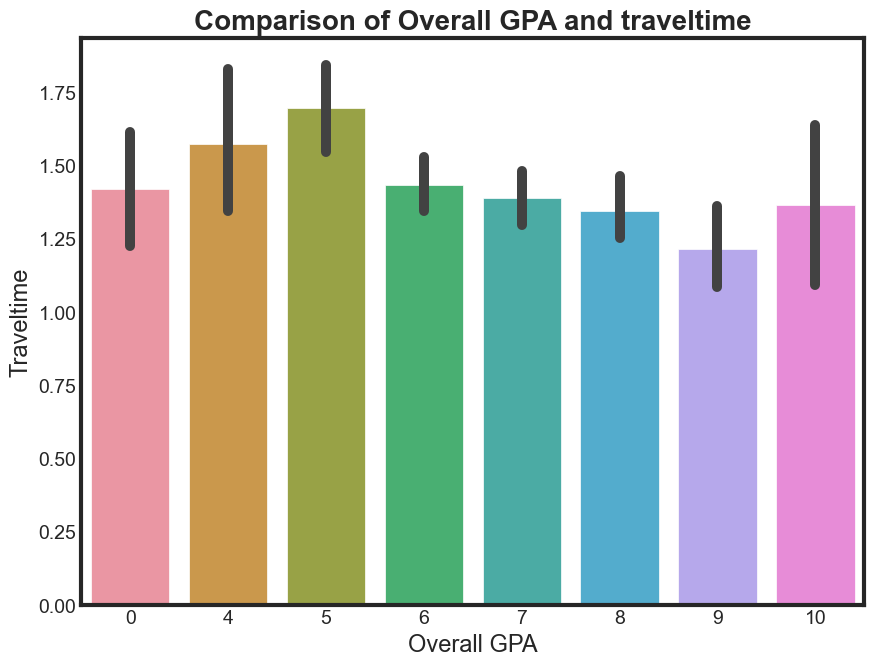

In [5058]:
graph = sns.barplot(data, x="overall_gpa", y="traveltime")
graph.set_title(
    "Comparison of Overall GPA and traveltime",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Overall GPA", fontweight=20, fontsize=17)
graph.set_ylabel("Traveltime", fontweight=20, fontsize=17)


Text(0, 0.5, 'Siblings count')

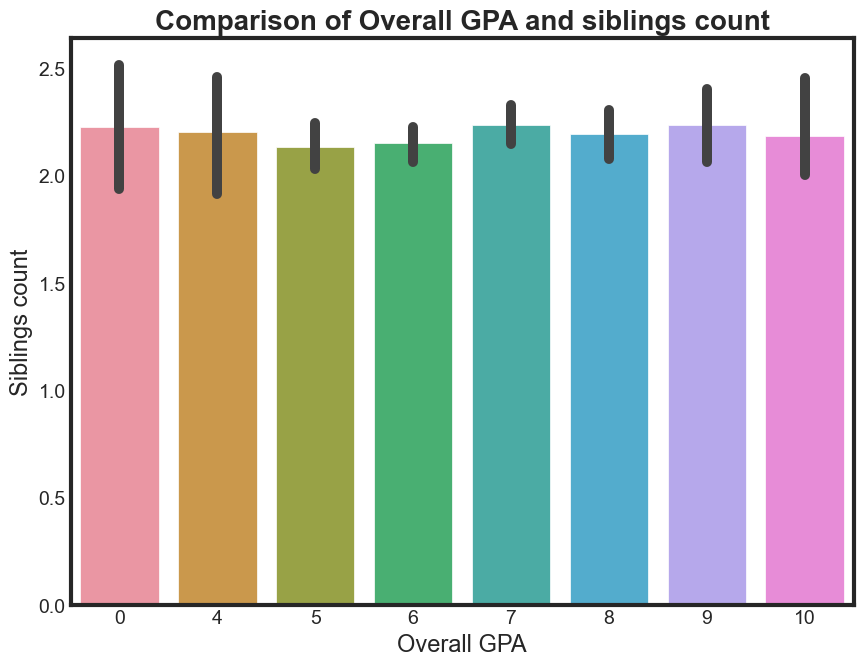

In [5059]:
graph = sns.barplot(data, x="overall_gpa", y="siblings")
graph.set_title(
    "Comparison of Overall GPA and siblings count",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Overall GPA", fontweight=20, fontsize=17)
graph.set_ylabel("Siblings count", fontweight=20, fontsize=17)


Text(0, 0.5, 'Overall GPA')

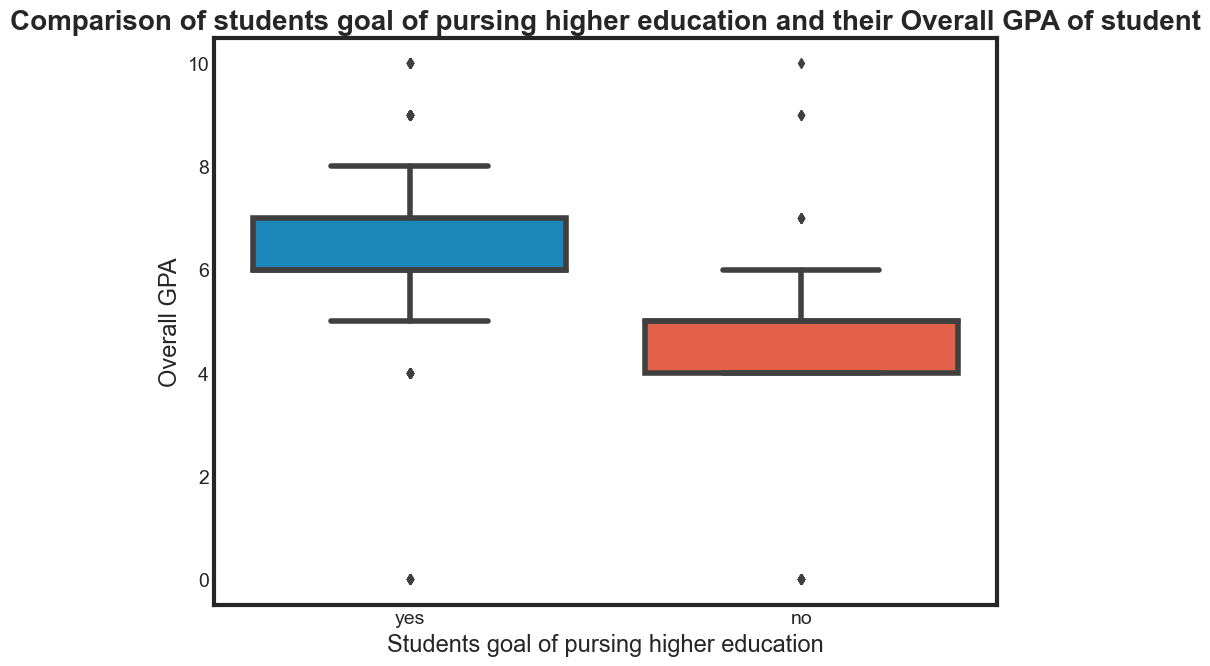

In [5060]:
graph = sns.boxplot(data, x="higher", y="overall_gpa")
graph.set_title(
    "Comparison of students goal of pursing higher education and their Overall GPA of student",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel(
    "Students goal of pursing higher education", fontweight=20, fontsize=17
)
graph.set_ylabel("Overall GPA", fontweight=20, fontsize=17)


Text(0, 0.5, 'Studytime')

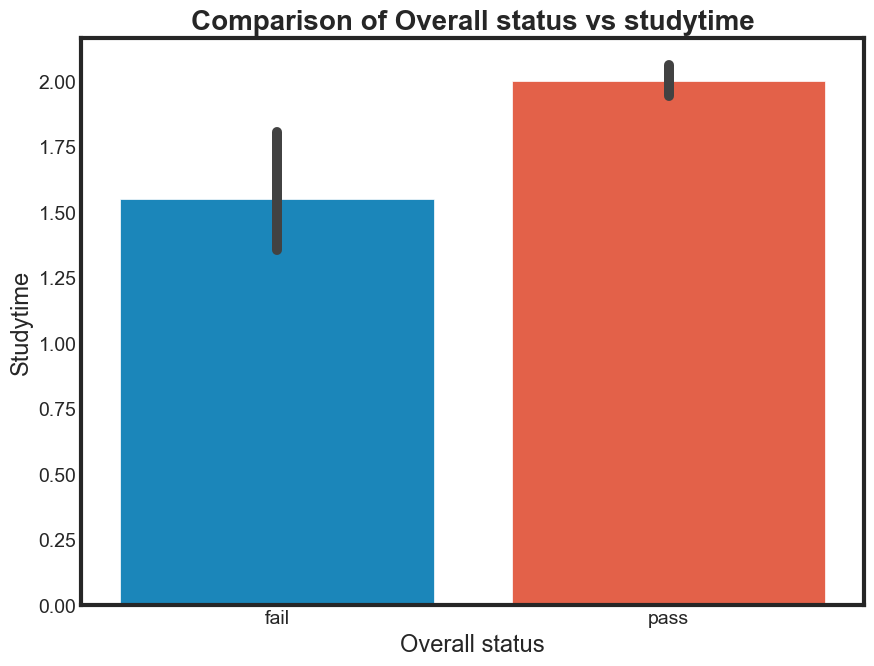

In [5061]:
graph = sns.barplot(data, x="overall_status", y="studytime")
graph.set_title(
    "Comparison of Overall status vs studytime",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Overall status", fontweight=20, fontsize=17)
graph.set_ylabel("Studytime", fontweight=20, fontsize=17)


Text(0, 0.5, 'Hangouts per week')

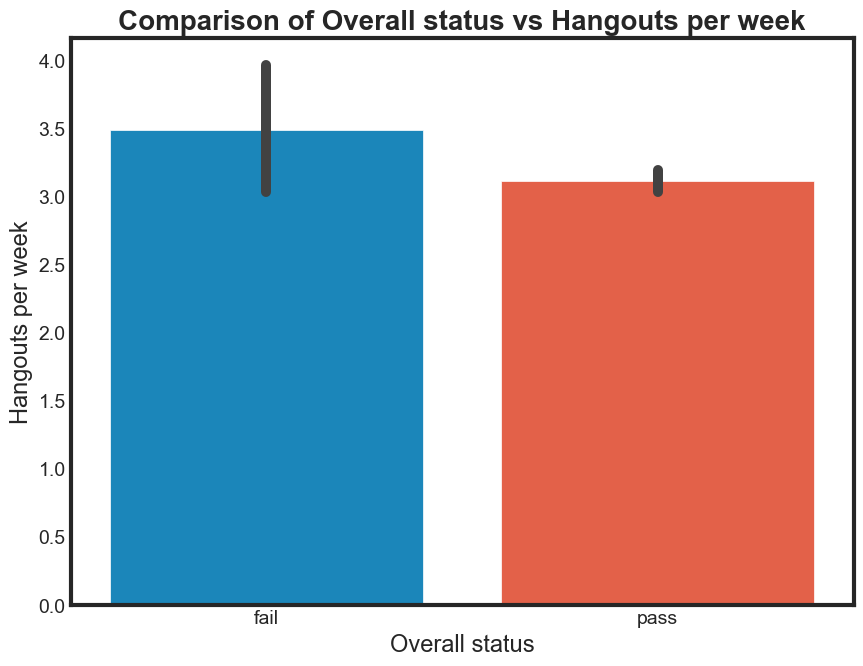

In [5062]:
graph = sns.barplot(data, x="overall_status", y="hangouts_p_week")
graph.set_title(
    "Comparison of Overall status vs Hangouts per week",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Overall status", fontweight=20, fontsize=17)
graph.set_ylabel("Hangouts per week", fontweight=20, fontsize=17)


Text(0, 0.5, 'Absences')

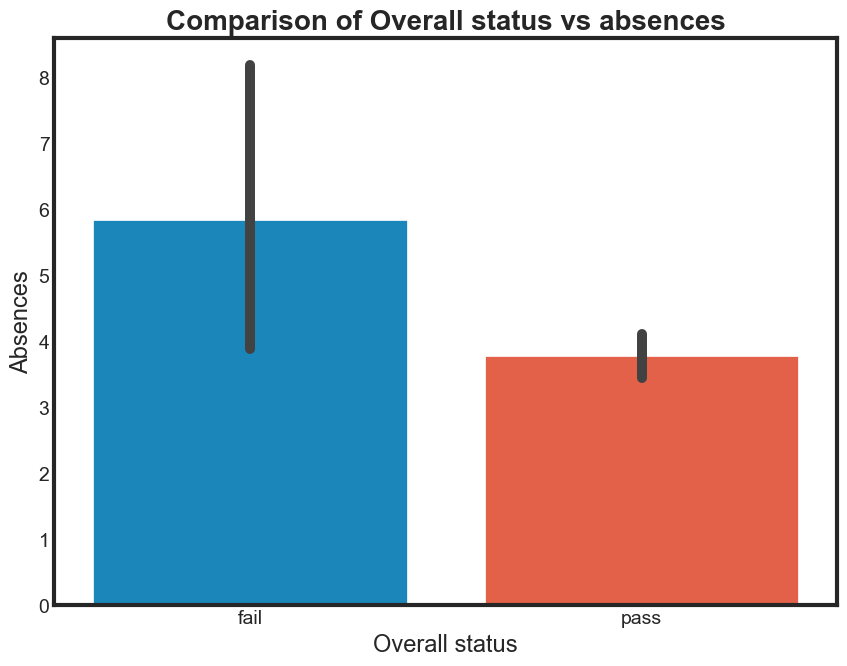

In [5063]:
graph = sns.barplot(data, x="overall_status", y="absences")
graph.set_title(
    "Comparison of Overall status vs absences",
    weight="bold",
    fontsize=20,
)
graph.set_xlabel("Overall status", fontweight=20, fontsize=17)
graph.set_ylabel("Absences", fontweight=20, fontsize=17)


Text(0.5, 20.583333333333293, 'activities')

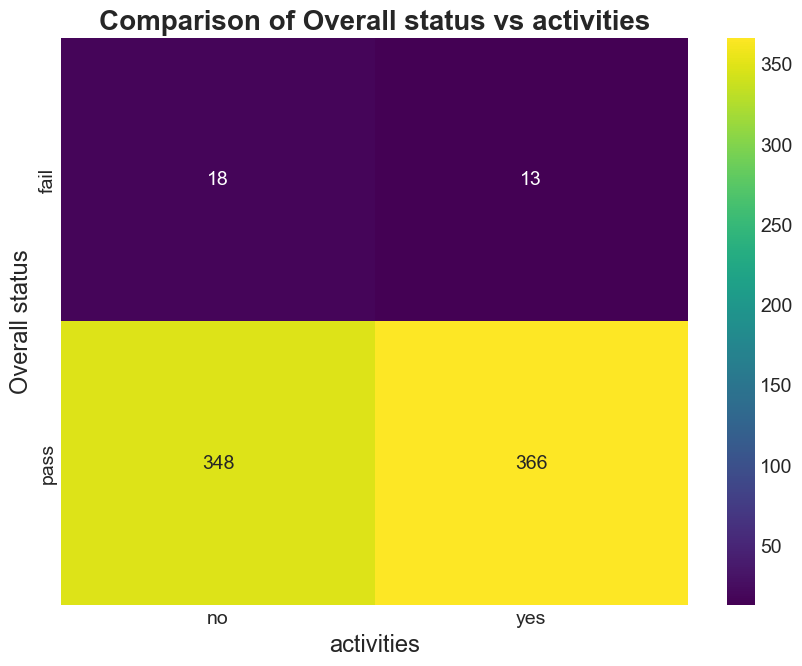

In [5064]:
ct = pd.crosstab(data["overall_status"], data["activities"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of Overall status vs activities",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Overall status", fontweight=20, fontsize=17)
graph.set_xlabel("activities", fontweight=20, fontsize=17)


Text(0.5, 20.583333333333293, 'Parental Education')

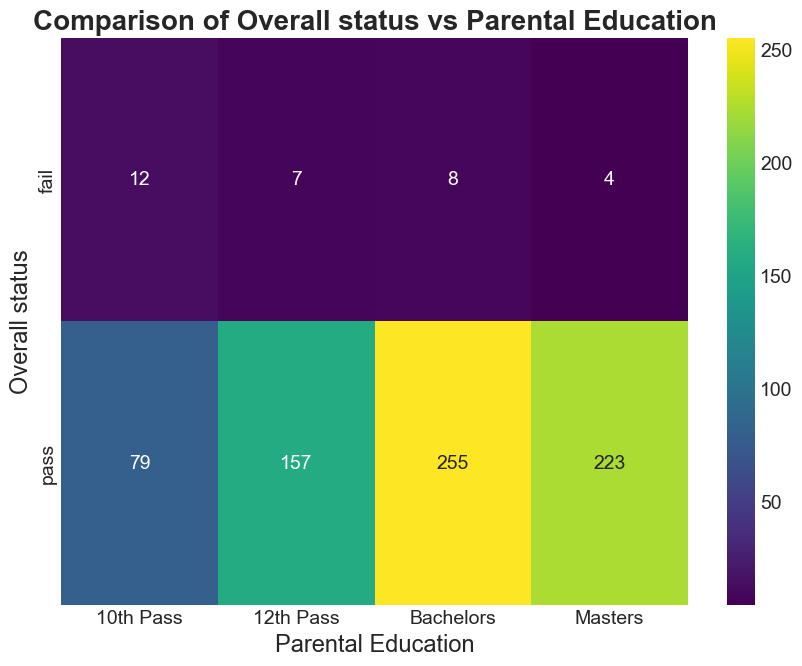

In [5065]:
ct = pd.crosstab(data["overall_status"], data["parentedu"])
graph = sns.heatmap(ct, annot=True, cmap="viridis", fmt="g")
graph.set_title(
    "Comparison of Overall status vs Parental Education",
    weight="bold",
    fontsize=20,
)
graph.set_ylabel("Overall status", fontweight=20, fontsize=17)
graph.set_xlabel("Parental Education", fontweight=20, fontsize=17)


## Encoding data


In [5066]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [5067]:
data.drop(
    columns=[
        "failed_subjects",
        "maths",
        "activities",
        "comp_sci",
        "stats",
        "maths_gpa",
        "comp_sci_gpa",
        "stats_gpa",
        "overall_gpa",
        "overall_status",
    ],
    inplace=True,
)
data.head()


,gender,reason,traveltime,studytime,failures,higher,siblings,freetime,hangouts_p_week,absences,parentedu,god,overall
0,F,course,2,2,0,yes,2,3,4,4,Masters,yes,F
1,F,course,1,2,0,yes,3,3,3,2,10th Pass,yes,B
2,F,other,1,2,0,yes,2,3,2,6,10th Pass,yes,B
3,F,home,1,3,0,yes,2,2,2,0,Masters,no,B+
4,F,home,1,2,0,yes,2,3,2,0,Bachelors,yes,B+


In [5068]:
data["gender"] = le.fit_transform(data["gender"])
data["reason"] = le.fit_transform(data["reason"])
data["higher"] = le.fit_transform(data["higher"])
data["parentedu"] = le.fit_transform(data["parentedu"])
data["god"] = le.fit_transform(data["god"])
data.head()


,gender,reason,traveltime,studytime,failures,higher,siblings,freetime,hangouts_p_week,absences,parentedu,god,overall
0,0,0,2,2,0,1,2,3,4,4,3,1,F
1,0,0,1,2,0,1,3,3,3,2,0,1,B
2,0,2,1,2,0,1,2,3,2,6,0,1,B
3,0,1,1,3,0,1,2,2,2,0,3,0,B+
4,0,1,1,2,0,1,2,3,2,0,2,1,B+


## Data preparation


In [5069]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [5070]:
X = data.iloc[:, :12]
y = data.iloc[:, 12]

print(X.shape)
print(y.shape)

print(X.head())
print(y.head())


(745, 12)
(745,)
   gender  reason  traveltime  studytime  failures  higher  siblings  \
0       0       0           2          2         0       1         2   
1       0       0           1          2         0       1         3   
2       0       2           1          2         0       1         2   
3       0       1           1          3         0       1         2   
4       0       1           1          2         0       1         2   

   freetime  hangouts_p_week  absences  parentedu  god  
0         3                4         4          3    1  
1         3                3         2          0    1  
2         3                2         6          0    1  
3         2                2         0          3    0  
4         3                2         0          2    1  
0     F
1     B
2     B
3    B+
4    B+
Name: overall, dtype: category
Categories (8, object): ['O', 'A+', 'A', 'B+', 'B', 'C', 'D', 'F']


In [5071]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(521, 12)
(521,)
(224, 12)
(224,)


In [5072]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)


[0.2187575  0.17253616 0.14539511 0.10640647 0.08009051 0.06815793
 0.05662821 0.04324905 0.03702567 0.03097211 0.02494611 0.01583516]


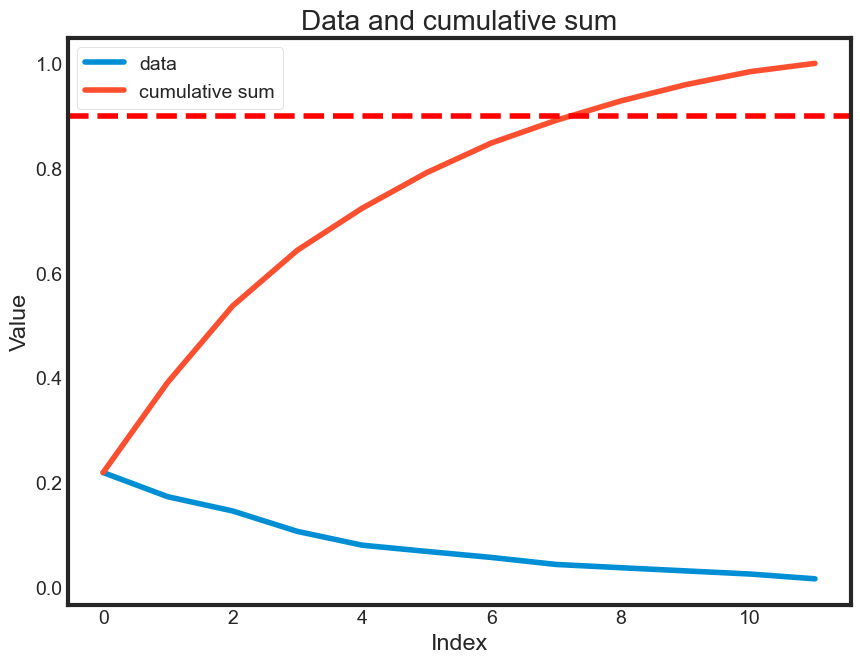

In [5073]:
pca = PCA(n_components=None)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

cumulative_sum = np.cumsum(explained_variance)

plt.plot(explained_variance, label="data")
plt.plot(cumulative_sum, label="cumulative sum")
plt.legend()

plt.axhline(y=0.9, linestyle="dashed", color="red")

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Data and cumulative sum")

plt.show()

pca = PCA(n_components=8)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


## Modelling


In [5074]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import radviz


In [5075]:
# sns.pairplot(data,hue='overall')


In [5076]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 0.33589251439539347
Testing Accuracy : 0.2767857142857143


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

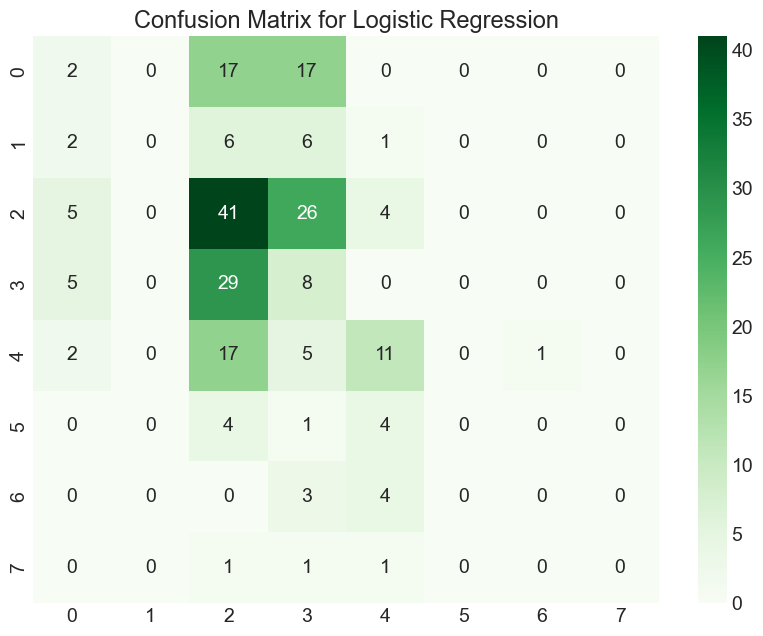

In [5077]:
cm = confusion_matrix(y_test, y_pred)

plt.rcParams["figure.figsize"] = (9, 7)
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Confusion Matrix for Logistic Regression", fontweight=20, fontsize=17)


In [5078]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 0.6833013435700576
Testing Accuracy : 0.32589285714285715


Text(0.5, 1.0, 'Confusion Matrix for KNN')

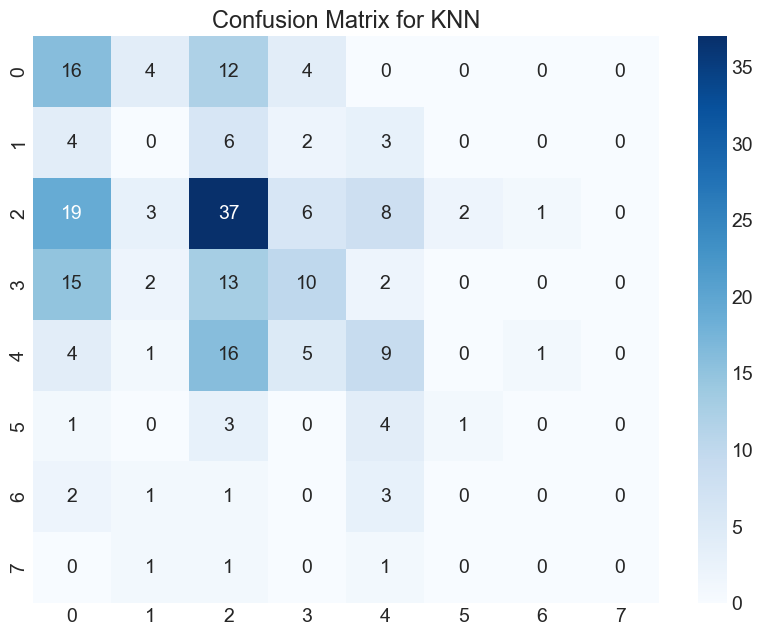

In [5079]:
cm = confusion_matrix(y_test, y_pred)

plt.rcParams["figure.figsize"] = (9, 7)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix for KNN", fontweight=20, fontsize=17)


In [5080]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 0.9654510556621881
Testing Accuracy : 0.4017857142857143


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

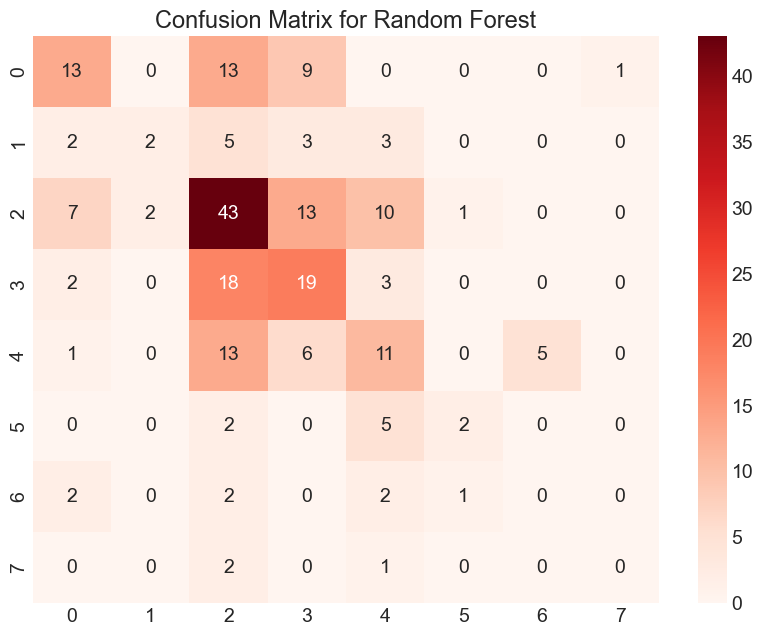

In [5081]:
cm = confusion_matrix(y_test, y_pred)

plt.rcParams["figure.figsize"] = (9, 7)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.title("Confusion Matrix for Random Forest", fontweight=20, fontsize=17)


Text(0.5, 1.0, 'Radial Visualization for Target')

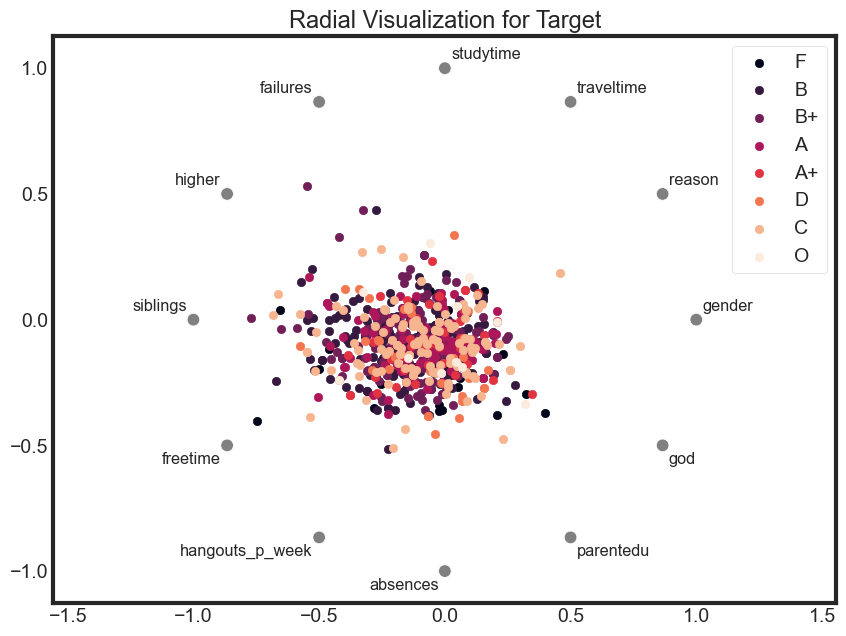

In [5082]:
fig, ax = plt.subplots(figsize=(9, 7))
new_data = X.copy()
new_data["overall"] = y
radviz(new_data, "overall", ax=ax, colormap="rocket")
plt.title("Radial Visualization for Target", fontsize=17)
